<a href="https://colab.research.google.com/github/Bala534/Regproject/blob/main/Cc_and_Cu_Calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D as ax
from sklearn.model_selection import train_test_split

from pandas import ExcelWriter
from pandas import ExcelFile

In [2]:
df = pd.read_excel('Cu and Cu Table of Data.xlsx')
df.head()

,S NO,HC (%),NQF (%),C (%),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,1,0.0,0.00,23.02,2.00,15.00,0.84,2.05
1,2,0.1,0.01,23.02,1.98,15.01,0.85,2.05
2,3,0.2,0.02,23.03,1.96,15.04,0.86,2.06
3,4,0.3,0.03,23.03,1.96,15.09,0.87,2.06
4,5,0.4,0.04,23.04,1.93,15.14,0.88,2.06


In [3]:
df.shape

(121, 8)

In [4]:
df.isna().sum() # checking for the nan values

S NO          0
HC (%)        0
NQF (%)       0
C (%)         0
Unnamed: 4    0
Unnamed: 5    0
Unnamed: 6    0
Unnamed: 7    0
dtype: int64

In [5]:
df.rename(columns = {'Unnamed: 4':'Ac','Unnamed: 5':'Φ','Unnamed: 6':'Cc','Unnamed: 7':'Cu'}, inplace = True) # Changing the column names

In [6]:
df.head()

,S NO,HC (%),NQF (%),C (%),Ac,Φ,Cc,Cu
0,1,0.0,0.00,23.02,2.00,15.00,0.84,2.05
1,2,0.1,0.01,23.02,1.98,15.01,0.85,2.05
2,3,0.2,0.02,23.03,1.96,15.04,0.86,2.06
3,4,0.3,0.03,23.03,1.96,15.09,0.87,2.06
4,5,0.4,0.04,23.04,1.93,15.14,0.88,2.06


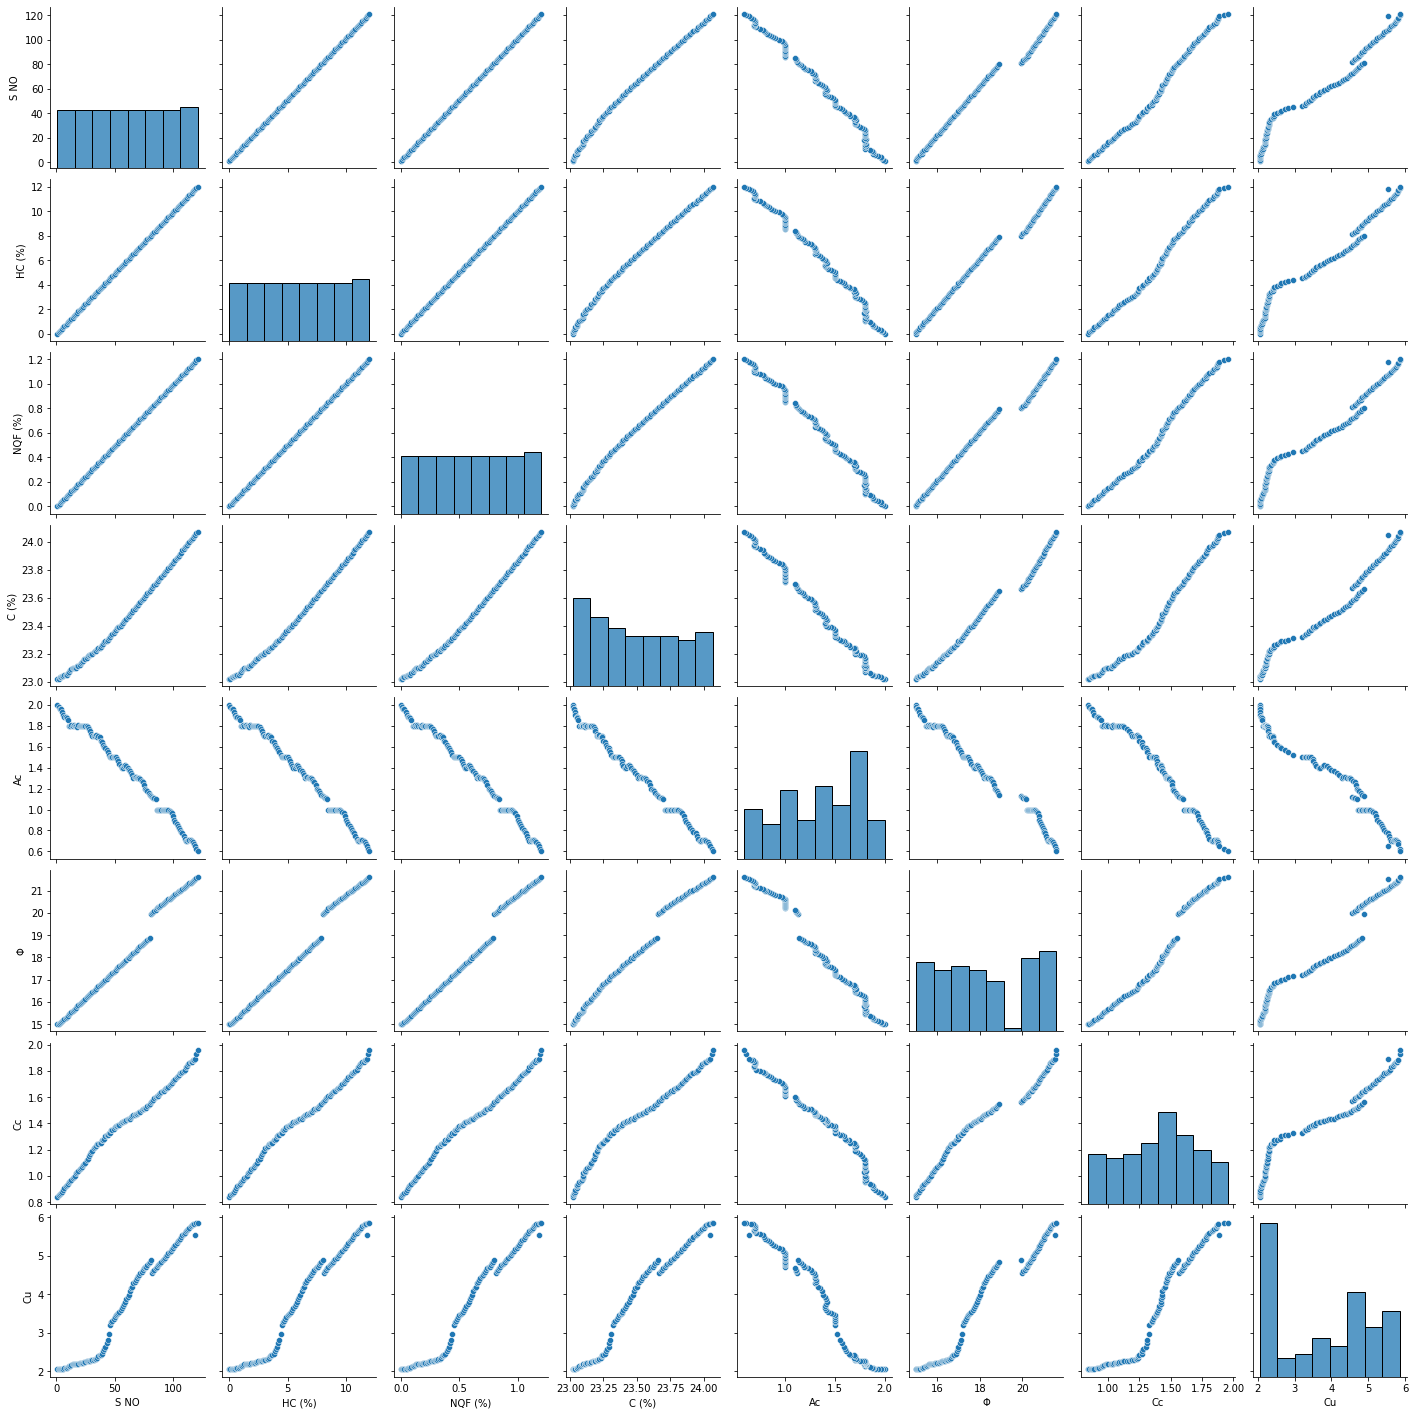

In [7]:
sns.pairplot(df) # visualizing the total data using pairplot

In [8]:
# taking the independent variables and dependent variables
features = df[['HC (%)','NQF (%)','C (%)','Ac','Φ']].values
labels = df[['Cc','Cu']].values

In [9]:
# Now divide the data into train and test. Here we are keeping 20% as our test set
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.2,random_state=2)

In [10]:
# Building the model on training data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 2)  
z = poly_regs.fit_transform(x_train)  
model =LinearRegression()  
model.fit(z, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# Predicting for the test data

In [12]:
m = poly_regs.fit_transform(x_test)

In [13]:
y_pred = model.predict(m)

In [14]:
y_pred

array([[1.46310782, 4.23693455],
       [1.296568  , 2.805577  ],
       [1.1601359 , 2.28983488],
       [1.51231768, 4.70232697],
       [1.41072623, 3.69534371],
       [0.88114477, 1.95575245],
       [1.11328574, 2.16052441],
       [1.4298827 , 3.87777294],
       [0.79885162, 2.4815546 ],
       [0.99293146, 2.21889494],
       [1.35401516, 3.21282716],
       [1.12437925, 2.17330334],
       [1.16948304, 2.37898234],
       [0.87567247, 1.96682554],
       [1.78196497, 5.43941473],
       [1.7904945 , 5.47133305],
       [1.65329519, 4.95065524],
       [1.84255335, 5.6341126 ],
       [0.99087767, 2.23895486],
       [1.49052233, 4.5020167 ],
       [1.33586935, 3.07624166],
       [0.89459447, 2.06193953],
       [1.26352358, 2.42017048],
       [1.329082  , 3.00225888],
       [1.24169708, 2.44595913]])

In [15]:
mean_absolute_error(y_test,y_pred) # calculating the mean absolute error for actual and predicted values

0.03843532827199089

In [16]:
mean_squared_error(y_test,y_pred) # calculating the mean squared error for actual and predicted values

0.006242877563215767

In [17]:
r2_score(y_test,y_pred) # calculating the r2 error for actual and predicted values

0.9951130046928746

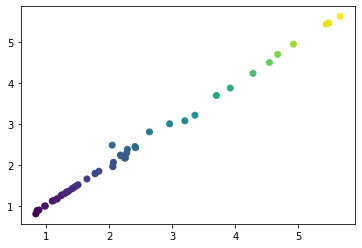

In [18]:
plt.scatter(y_test, y_pred, c=y_pred, cmap='viridis');

In [19]:
#Predicting the unknown value(not in the data)

In [20]:
unknown = np.array([12.7,2.4,25.07,0.78,23.58]).reshape(1,-1)

In [21]:
n = poly_regs.fit_transform(unknown)

In [22]:
value = model.predict(n)
value

array([[ 16.76176097, -51.64561216]])